<a href="https://colab.research.google.com/github/Deborahnvaes/first-web-scraping/blob/main/Web_Scraping_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### *web Scraping no site do Alura com o nome dos cursos mais acessados; em seguida fiz uma Análise de palavras-chave, extraí os termos-chave dos nomes dos cursos para identificar os temas mais comuns ou relevantes em toda a lista de cursos.*

Fiz seguindo alguns passos, tais como:


* ✈  Pré processamento de texto ( Para garantir que os dados estejam limpos e uniformes)
* ✈ Contagem de Palavras (Contei a frequência de palavras nos nomes dos cursos)
* ✈  Vizualização das palavras (Idenficando as palavras mais relevantes)
* ✈  Análise e Interpretação (Após criar a nuvem de palavras, encontrei as palavras-chaves mais comuns no nome dos cursos.)



> 🚀 *Ferramentas utilizadas:*

1.   Python.
2.   Biblioteca de Scraping: (BeautifulSoup).
3.   Ambiente Virtual: Google Colab.






In [ ]:
pip install nltk

In [ ]:
pip install wordcloud matplotlib

In [ ]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import nltk
import string

In [ ]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#URL da página que usei para o web scraping
url = 'https://www.alura.com.br/cursos-online-programacao'

In [ ]:
# solicitação HTTP
response = requests.get(url)

In [ ]:
#Verificação se a solocitação foi bem sucedida
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    #Encontrando os elementos que contêm os nomes dos cursos mais acessados
    cursos_acessados = soup.find_all('div', class_='subcategoria lista-subcategorias__subcategoria')

    cursos = ['Lógica de programação', 'Python web', 'Node.JS', 'PHP', 'Java', '.NET', 'C#', 'Desenvolvimento de jogos', 'Computação', 'Quality Assurance', 'Elixir', 'Kotlin', 'Embarcados e Robótica', 'Internet das coisas', 'Clojure', 'GoLang', 'C e C++']

    # Iterando sobre os elementos encontrados e extrair os nomes dos cursos
    for curso in cursos_acessados:
      cursos_element = curso.find("h2")
      if cursos_element:
        nomeCurso = cursos_element.get_text()
        cursos.append(nomeCurso)

  # Análise estastística
    num_cursos = len(cursos)
    print("Nome dos cursos:", num_cursos)
    print(cursos)

else:
    print('Não foi possível acessar a página.')

Nome dos cursos: 34
['Lógica de programação', 'Python web', 'Node.JS', 'PHP', 'Java', '.NET', 'C#', 'Desenvolvimento de jogos', 'Computação', 'Quality Assurance', 'Elixir', 'Kotlin', 'Embarcados e Robótica', 'Internet das coisas', 'Clojure', 'GoLang', 'C e C++', 'Lógica de programação', 'Python web', 'Node.JS', 'PHP', 'Java', '.NET', 'C#', 'Desenvolvimento de jogos', 'Computação', 'Quality Assurance', 'Elixir', 'Kotlin', 'Embarcados e Robótica', 'Internet das coisas', 'Clojure', 'GoLang', 'C e C++']


In [ ]:
print(cursos)

['Lógica de programação', 'Python web', 'Node.JS', 'PHP', 'Java', '.NET', 'C#', 'Desenvolvimento de jogos', 'Computação', 'Quality Assurance', 'Elixir', 'Kotlin', 'Embarcados e Robótica', 'Internet das coisas', 'Clojure', 'GoLang', 'C e C++', 'Lógica de programação', 'Python web', 'Node.JS', 'PHP', 'Java', '.NET', 'C#', 'Desenvolvimento de jogos', 'Computação', 'Quality Assurance', 'Elixir', 'Kotlin', 'Embarcados e Robótica', 'Internet das coisas', 'Clojure', 'GoLang', 'C e C++']


In [ ]:
def preprocess_text_list(cursos):
    cursos_preprocessados = []

In [ ]:
stop_words = set(stopwords.words('portuguese'))

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [ ]:
nome_cursos = cursos

# Lista para armazenar os cursos pré-processados
cursos_preprocessados = []

for curso in cursos:
    # Converter texto para letras minúsculas
    curso = curso.lower()

    # Removendo pontuação
    curso = ''.join([char for char in curso if char not in string.punctuation])

    # Tokenização
    tokens = tokenizer.tokenize(curso)

    # Removendo stopwords
    tokens = [word for word in tokens if word not in stop_words]

    cursos_preprocessados.append(tokens)

if cursos_preprocessados:
    todos_os_tokens = []
    for lista_tokens in cursos_preprocessados:
        if lista_tokens:
            todos_os_tokens.extend(lista_tokens)

    contagem_palavras = Counter(todos_os_tokens)

    palavras_mais_comuns = contagem_palavras.most_common(10)

    for palavra, contagem in palavras_mais_comuns:
        print(f'{palavra}: {contagem}')
else:
    print("A lista está vazia.")

c: 6
lógica: 2
programação: 2
python: 2
web: 2
nodejs: 2
php: 2
java: 2
net: 2
desenvolvimento: 2


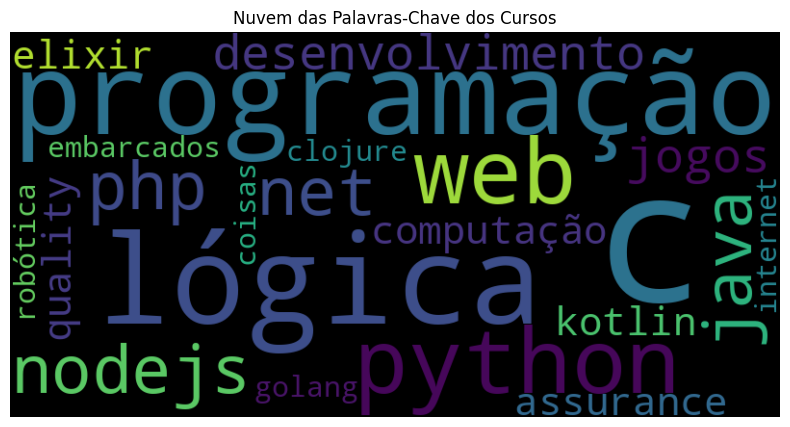

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#instância do WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(contagem_palavras)

#nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem das Palavras-Chave dos Cursos')
plt.show()
